<a href="https://colab.research.google.com/github/srujan-b/computervision/blob/main/qrcode-Detector/qrcodeDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we aim to develop a QR Code Detector and Decoder utilizing the OpenCV library from the ground up. Our objective is to create a comprehensive solution for detecting and decoding QR codes. Following the implementation, we will apply our QR Code Detector to analyze a sample image provided below.

**Here are the key steps to be undertaken in this project:**


**Image Loading:**

Import the target image for analysis.
QR Code Detection:

Utilize OpenCV to identify QR codes within the loaded image.

**Bounding Box Visualization:**

Implement a mechanism to draw a bounding box around the identified QR code for clear visualization.

**Decoding Text:**

Employ decoding algorithms to extract text information from the detected QR code.

**Output Presentation:**

Print the decoded text for reference and further analysis.

**Result Image Handling:**

Save the processed image with the bounding box to provide a visual representation of the detected QR code.

**Display:**

Showcase the result image to facilitate examination and validation of the QR code detection and decoding process.

In [1]:
!git clone https://github.com/srujan-b/computervision.git

Cloning into 'computervision'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 85 (delta 17), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (85/85), 2.99 MiB | 13.75 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [3]:
%matplotlib inline

# Import modules
import cv2
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

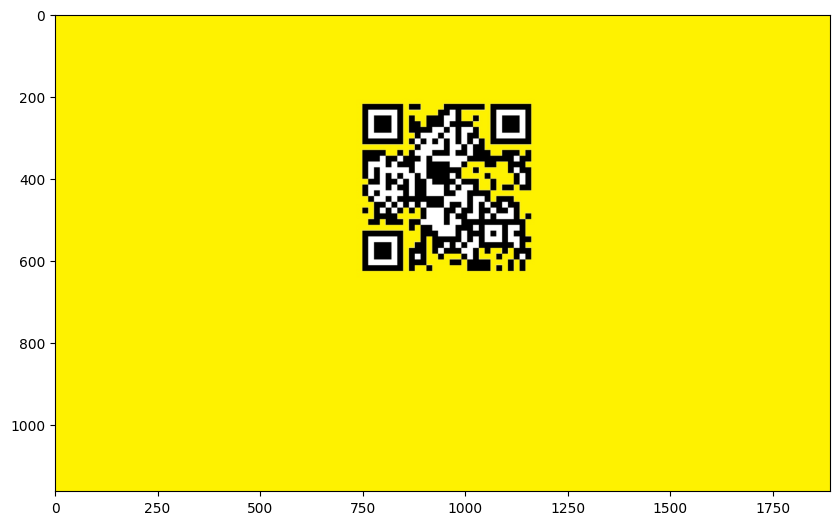

In [4]:
qrCode = cv2.imread("/content/computervision/qrcode-Detector/Qr code Detector.png")

qrCodeImage = qrCode.copy()
qrImage = qrCode.copy()
plt.imshow(qrCodeImage[:,:,::-1])

In [5]:
qrDecoder = cv2.QRCodeDetector()
decodedMessage, boundingBox, _ = qrDecoder.detectAndDecode(qrImage)

if decodedMessage != None:
    print("QR Code Detected")
else:
    print("QR Code NOT Detected")

QR Code Detected


In [16]:
# Get the number of points in the bounding box
n = len(boundingBox[0])
print(n)

# Draw lines connecting consecutive points in the bounding box
for i in range(0, n):

    # Determine the index of the next point, considering wrapping around
    nextIndex = (i + 1) % n
    # Extract points from the boundingBox list
    pt1 = tuple(map(int, boundingBox[0][i]))
    pt2 = tuple(map(int, boundingBox[0][nextIndex]))

    # Draw a line between current and next points
    cv2.line(qrImage, pt1, pt2, (0, 0, 255), thickness=4, lineType=cv2.LINE_AA)

4


In [17]:
cv2.putText(qrImage, decodedMessage, (100, 900), cv2.FONT_HERSHEY_SIMPLEX, 2, (250, 0, 0), 3, cv2.LINE_AA);

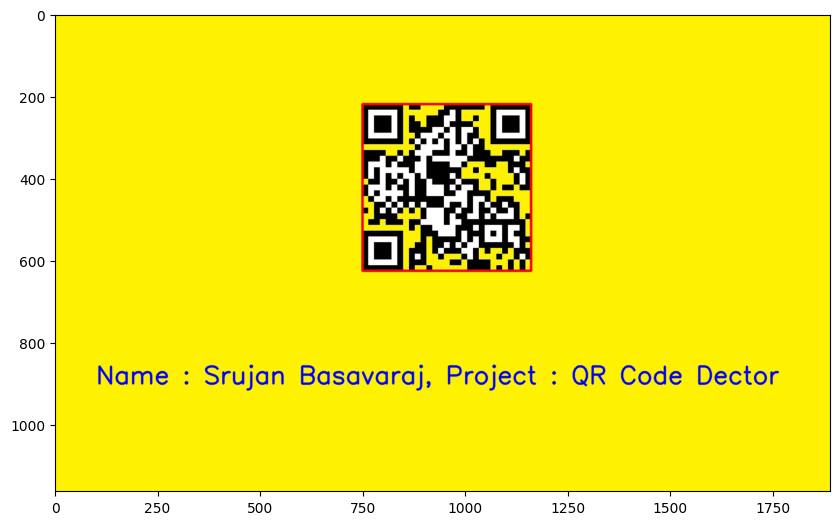

In [18]:
plt.imshow(qrImage[:,:,::-1])

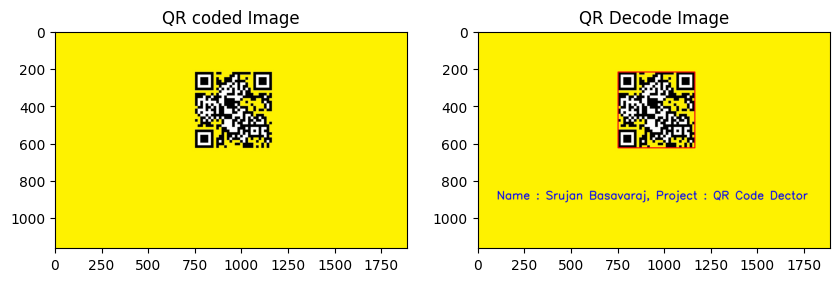

In [21]:
# Display images side by side
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.imshow(qrCodeImage[:, :, ::-1])
plt.title('QR coded Image')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.imshow(qrImage[:, :, ::-1])
plt.title('QR Decode Image')

plt.show()
